# Churn Modelling Prediction Deep Learnign ANN Project
Project Introduction: Churn Modeling Prediction with Artificial Neural Networks (ANN)

The goal of this deep learning project is to develop a churn modeling prediction system using Artificial Neural Networks (ANN). Churn modeling refers to the analysis of customer behavior to predict the likelihood of customers leaving a service or product. By accurately identifying potential churners, businesses can take proactive measures to retain valuable customers, reduce attrition, and improve overall customer satisfaction.

In this project, we will utilize a dataset containing various attributes of customers, including their credit score, geography, gender, age, tenure, balance, number of products, credit card status, activity level, and estimated salary. The dataset also provides information about whether a customer has exited or remained with the company. This data will serve as the foundation for training our ANN model to predict churn.

Artificial Neural Networks (ANN) are a class of machine learning algorithms inspired by the structure and functioning of the human brain. ANN models consist of interconnected nodes, or neurons, organized in layers. Each neuron receives input signals, processes them through an activation function, and generates an output signal. By iteratively adjusting the connection weights between neurons, ANNs can learn complex patterns and make accurate predictions.

Through this project, we aim to build a robust churn prediction model using an ANN architecture. The trained model will take customer attributes as input and provide a churn prediction as output. This predictive capability will enable businesses to proactively address customer churn by implementing targeted retention strategies, such as personalized offers, tailored communication, or enhanced customer experiences.

By leveraging the power of deep learning and ANN techniques, we can provide businesses with valuable insights into customer behavior and improve their ability to retain customers. The project will involve data preprocessing, model training, evaluation, and deployment, enabling organizations to integrate churn prediction into their decision-making processes and enhance customer retention strategies.

Let's dive into the implementation details and leverage ANN to build an effective churn prediction model using the provided dataset.

Background of the Dataset:

The dataset used in this churn modeling prediction project contains information about customers and their behaviors, which will be instrumental in training our Artificial Neural Network (ANN) model. Understanding the background of the dataset is crucial for gaining insights into the context of the problem and interpreting the results accurately.

The dataset consists of various attributes for each customer, including:

1. RowNumber: Represents the index or row number of the data entry.
2. CustomerId: A unique identifier for each customer.
3. Surname: The customer's surname or last name.
4. CreditScore: The credit score of the customer, indicating their creditworthiness.
5. Geography: The country or region to which the customer belongs (e.g., France, Spain).
6. Gender: The gender of the customer (e.g., Female, Male).
7. Age: The age of the customer.
8. Tenure: The number of years the customer has been associated with the company.
9. Balance: The account balance of the customer.
10. NumOfProducts: The number of products the customer has subscribed to.
11. HasCrCard: Indicates whether the customer possesses a credit card (1 for Yes, 0 for No).
12. IsActiveMember: Indicates whether the customer is an active member (1 for Yes, 0 for No).
13. EstimatedSalary: The estimated salary of the customer.
14. Exited: A binary variable indicating whether the customer has exited the company (1 for Yes, 0 for No).

This dataset provides a snapshot of customers and their associated attributes, allowing us to analyze patterns and predict churn. The goal is to build an ANN model that can effectively learn from this data and predict the likelihood of a customer churning, based on their characteristics and behavior.

By analyzing the relationships between various features, such as credit score, tenure, balance, and customer activity, we can gain insights into the factors that contribute to customer churn. This information can be leveraged by businesses to identify at-risk customers and implement retention strategies aimed at reducing churn rates and improving customer satisfaction.

With this dataset, we have a valuable opportunity to explore the power of ANN models in predicting customer churn and ultimately assisting businesses in making data-driven decisions to enhance customer retention.
---


# 1. Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

#### Data Assessment

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [14]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.duplicated().sum()

0

# 2. Data Pre-proccessing

In [3]:
# Drop irrelevant columns (e.g., RowNumber, CustomerId, Surname)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Feature Engineering  

In [4]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# 4. Feature Scalling

In [7]:
# Perform feature scaling on numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [29]:
X_test_scaled

array([[-0.57749609,  0.30164867,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.29729735, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.52560743,  1.50884694, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.81311987, -0.9055496 , -1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [ 0.41876609, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [-0.24540869,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]])

# 5. Building the ANN Model

In [8]:
# Initialize the ANN model
model = keras.Sequential()

# Add input layer and first hidden layer
model.add(keras.layers.Dense(units=16, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add additional hidden layers
model.add(keras.layers.Dense(units=8, activation='relu'))

# Add output layer
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


# 6. Training the ANN Model

#### Applying Early Stopping Techniqye to Avoid Overfitting problem

In [9]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience= 20,
    verbose= 1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [10]:
# Train the ANN model
model_history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks = early_stopping)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.6582 - accuracy: 0.6316 - val_loss: 0.5073 - val_accuracy: 0.7994
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7936 - val_loss: 0.4370 - val_accuracy: 0.8037
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8019 - val_loss: 0.4174 - val_accuracy: 0.8263
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8200 - val_loss: 0.4051 - val_accuracy: 0.8294
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8320 - val_loss: 0.3913 - val_accuracy: 0.8413
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8462 - val_loss: 0.3813 - val_accuracy: 0.8444
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8516 - val_loss: 0.3729 - val_accuracy: 0.8462

In [11]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


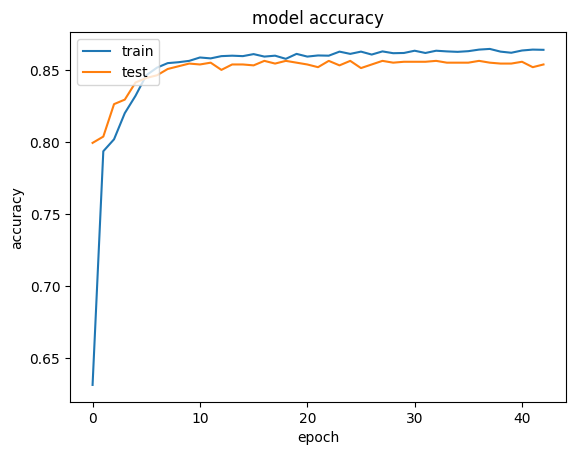

In [12]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

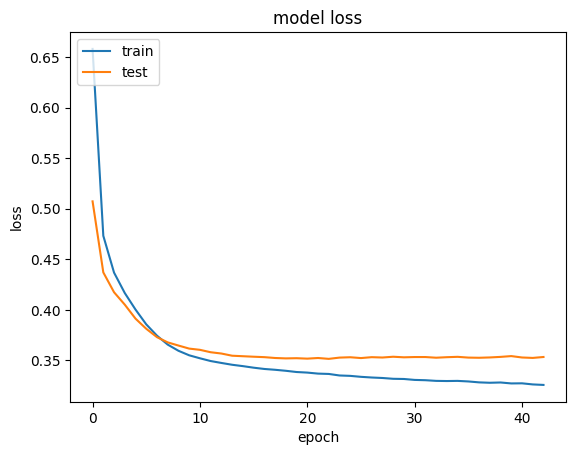

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# 7. Make predictions on the testing set


In [14]:
y_pred = model.predict(X_test_scaled)
y_pred = np.round(y_pred).flatten()
print(y_pred)

63/63 [==============================] - 0s 2ms/step
[0. 0. 0. ... 1. 0. 0.]


# 8. Evaluating the ANN Model

In [16]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)



Accuracy: 0.8615
Precision: 0.7457627118644068
Recall: 0.44783715012722647
F1-Score: 0.5596184419713831
Confusion Matrix:
[[1547   60]
 [ 217  176]]


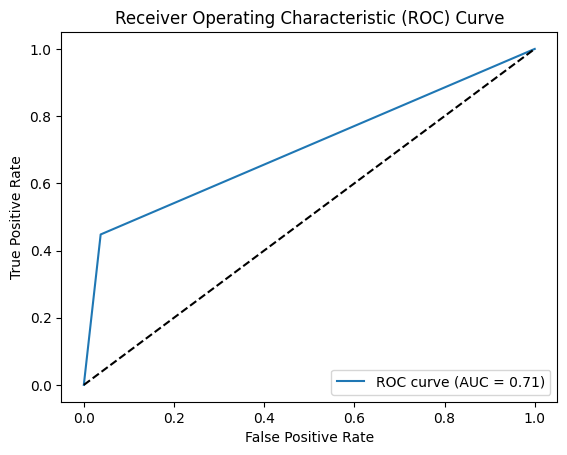

In [17]:
# Generate ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 9. Model Optimization
### Hyper-perameter Tuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def create_model(units=16, activation='relu', optimizer='adam'):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=units, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(keras.layers.Dense(units=units, activation=activation))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameters to tune
param_dist = {
    'units': sp_randint(8, 33),            # Number of units in hidden layers
    'activation': ['relu', 'tanh'],        # Activation function
    'optimizer': ['adam', 'rmsprop'],      # Optimization algorithm
    'batch_size': sp_randint(32, 129),     # Batch size
    'epochs': sp_randint(50, 201)          # Number of training epochs
}

# Create the model to tune
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy')

# Perform random search
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Epoch 1/76


<ipython-input-16-0b8b29ee78a1>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)


Streaming output truncated to the last 5000 lines.
44/44 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8598
Epoch 26/170
44/44 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8607
Epoch 27/170
44/44 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8645
Epoch 28/170
44/44 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8616
Epoch 29/170
44/44 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.8635
Epoch 30/170
44/44 [==============================] - 0s 4ms/step - loss: 0.3363 - accuracy: 0.8641
Epoch 31/170
44/44 [==============================] - 0s 5ms/step - loss: 0.3364 - accuracy: 0.8616
Epoch 32/170
44/44 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.8633
Epoch 33/170
44/44 [==============================] - 0s 5ms/step - loss: 0.3344 - accuracy: 0.8646
Epoch 34/170
44/44 [==============================] - 0s 6ms/s

In [17]:
# Initialize the ANN model
new_model = keras.Sequential()

# Add input layer and first hidden layer
new_model.add(keras.layers.Dense(units=18, activation='tanh', input_dim=X_train_scaled.shape[1]))

# Add additional hidden layers
new_model.add(keras.layers.Dense(units=8, activation='tanh'))

# Add output layer
new_model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
new_model.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 18)                198       
                                                                 
 dense_97 (Dense)            (None, 8)                 152       
                                                                 
 dense_98 (Dense)            (None, 1)                 9         
                                                                 
Total params: 359
Trainable params: 359
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the ANN model
model_history = new_model.fit(X_train_scaled, y_train, batch_size=115, epochs=52, validation_split=0.2, callbacks = early_stopping)

# Evaluate the model on the testing set
test_loss, test_accuracy = new_model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/52
56/56 [==============================] - 2s 7ms/step - loss: 0.6369 - accuracy: 0.6472 - val_loss: 0.5616 - val_accuracy: 0.7425
Epoch 2/52
56/56 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.7752 - val_loss: 0.4739 - val_accuracy: 0.7987
Epoch 3/52
56/56 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.8002 - val_loss: 0.4344 - val_accuracy: 0.8131
Epoch 4/52
56/56 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.8031 - val_loss: 0.4239 - val_accuracy: 0.8156
Epoch 5/52
56/56 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.8058 - val_loss: 0.4187 - val_accuracy: 0.8181
Epoch 6/52
56/56 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.8097 - val_loss: 0.4159 - val_accuracy: 0.8200
Epoch 7/52
56/56 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8091 - val_loss: 0.4110 - val_accuracy: 0.8213
Epoch 8/52
56/56 [==

# Save trained Model with pickle

In [19]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()